**MAIN BODY OF DATA CLEANING**

In [1]:
import numpy as np
from scipy import misc
from importlib import reload
import random
import pprint as pp
import pandas as pd
import pprint as pp
import math
import matplotlib.pyplot as plt

In [2]:
def reverse_dict(original_dict):
    reversed_dict = {v: k for k, v in original_dict.items()}
    return reversed_dict

In [3]:
def write_labels_to_file(labels, file_path):
    with open(file_path, 'w') as file:
        for label in labels:
            file.write(str(label) + '\n')

In [28]:
def calculateMean(data):
    sumData = 0
    for i in range(len(data)):
        sumData += data[i]
    mean = sumData / len(data)
    return mean

def calculatePlotValues(error_array):
    y = [] # mean values
    e = [] # standard deviations
    
    for parameter in error_array:
        y.append(calculateMean(parameter))
        e.append(np.std(parameter))
    return y, e

In [29]:
def getDataFrame(file_path):
    # Load the CSV file into a DataFrame, assuming the first row contains column names
    df = pd.read_csv(file_path, index_col=0)  # Assuming the index is in the first column
    return df

In [30]:
def get_values(dataframe, column):
    """
    Get all possible parameters for the given feature
    """
    unique_features = []
    for entry in dataframe.loc[:,column]:
        try:
            if math.isnan(entry):
                continue
        except:
            if (entry not in unique_features):
                unique_features.append(entry)
    unique_features = enumerate(unique_features, 1)
    unique_features = [t[::-1] for t in unique_features]
    unique_features = dict(unique_features)
    return unique_features


In [31]:
def change_type(dataframe, column_name):
    """
    Change the value of the parameters that should be float from string
    """
    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
    return dataframe
    

In [32]:
def assignTargetClasses(dataframe):
    """
    Give the string y-values a class of a number 1, 2, 3, ... 
    """
    y_values = get_values(dataframe, 'y')
    dataframe['y'] = dataframe['y'].map(y_values)
    
    return dataframe, y_values

In [33]:
def assignInputClasses(dataframe, column_name):
    """
    Assign a value to a parameter value that is not a float or int (x7)
    """
    x_values = get_values(dataframe, column_name)
    dataframe[column_name] = dataframe[column_name].map(x_values)
    
    return dataframe, x_values

In [34]:
def checkColumnUniqness(dataframe, column_name):
    """
    Check the column to see if the entries in it are the same, if they are, delete the column
    """
    is_same = dataframe[column_name].nunique() == 1

    if is_same:
        dataframe = dataframe.drop(column_name, axis=1)

    return dataframe

In [35]:
# Function to filter rows with correct data types
def filter_correct_data_types(df):
    mask = True
    # Define the expected data types for each column
    expected_data_types = {
        'y': str,
        'x1': float,
        'x2': float,
        'x3': float,
        'x4': float,
        'x5': float,
        'x6': float,
        'x7': str,
        'x8': float,
        'x9': float,
        'x10': float,
        'x11': float,
        'x12': bool,
        'x13': float
    }
    for column_name, expected_type in expected_data_types.items():
        mask &= df[column_name].apply(lambda x: isinstance(x, expected_type))

    if not mask.any():
        print("No rows match the expected data types.")

    return df[mask]


In [36]:
def writeToCsv(dataframe, file_name):

    # Write the DataFrame to a CSV file
    dataframe.to_csv(file_name, index=False)
    print(f"""Dataframe written to {file_name}""")
    return None

In [37]:
def extractData(dataframe):
    """
    Extract inputs and targets from the dataset
    """
    x_columns = dataframe.columns
    inputs = dataframe[x_columns].values
    inputs = inputs[:, 1:]
    targets = None
    if 'y' in dataframe.columns:
        targets= dataframe['y'].values
    
    return inputs, targets

In [38]:
def extractDataToClassify(dataframe):
    """
    Extract inputs and targets from the dataset
    """
    x_columns = dataframe.columns
    inputs = dataframe[x_columns].values
    targets = None
    if 'y' in dataframe.columns:
        targets= dataframe['y'].values
    
    return inputs, targets

In [39]:
def clearData(dataframe):
    dataframe = dataframe.dropna()
    dataframe = change_type(dataframe, 'x1')
    dataframe = change_type(dataframe, 'x2')
    dataframe = change_type(dataframe, 'x3')
    dataframe = change_type(dataframe, 'x4')
    dataframe = change_type(dataframe, 'x5')
    dataframe = change_type(dataframe, 'x6')
    dataframe = change_type(dataframe, 'x8')
    dataframe = change_type(dataframe, 'x9')
    dataframe = change_type(dataframe, 'x10')
    dataframe = change_type(dataframe, 'x11')
    dataframe['x12'] = dataframe['x12'].astype(bool)
    dataframe = change_type(dataframe, 'x13')
    
    dataframe = filter_correct_data_types(dataframe)
    dataframe, y_values = assignTargetClasses(dataframe)
    # Data specifics that only x7 is a string
    dataframe, x_values = assignInputClasses(dataframe, 'x7')
    
    # See of entries in a given column are the same, if so, delete the column
    """
    for column_name in dataframe.columns:
        dataframe = checkColumnUniqness(dataframe, column_name)
    """
    return dataframe, y_values, x_values

In [40]:
def clearDataToClassify(dataframe, x_values):
    dataframe = change_type(dataframe, 'x1')
    dataframe = change_type(dataframe, 'x2')
    dataframe = change_type(dataframe, 'x3')
    dataframe = change_type(dataframe, 'x4')
    dataframe = change_type(dataframe, 'x5')
    dataframe = change_type(dataframe, 'x6')
    dataframe = change_type(dataframe, 'x8')
    dataframe = change_type(dataframe, 'x9')
    dataframe = change_type(dataframe, 'x10')
    dataframe = change_type(dataframe, 'x11')
    dataframe['x12'] = dataframe['x12'].astype(bool)
    dataframe = change_type(dataframe, 'x13')
    
    # Data specifics that only x7 is a string
    # TODO: assign input classes from the dictionary created from the training data set
    dataframe['x7'] = dataframe['x7'].map(x_values)
    
    return dataframe

In [41]:
def reverseTargetAssignment(predictedLabels=None):
    
    df = getDataFrame("TrainOnMe.csv")
    df = df.dropna()
    df = change_type(df, 'x1')
    df = change_type(df, 'x2')
    df = change_type(df, 'x3')
    df = change_type(df, 'x4')
    df = change_type(df, 'x5')
    df = change_type(df, 'x6')
    df = change_type(df, 'x8')
    df = change_type(df, 'x9')
    df = change_type(df, 'x10')
    df = change_type(df, 'x11')
    df['x12'] = df['x12'].astype(bool)
    df = change_type(df, 'x13')
    
    df = filter_correct_data_types(df)
    y_values = assignTargetClasses(df)[1]
    y_values = reverse_dict(y_values)

    output_labels = []
    for label in predictedLabels:
        output_labels.append(y_values[label])
    return output_labels

In [42]:
df = getDataFrame("TrainOnMe.csv")
cleared_dataframe = clearData(df)[0]
writeToCsv(cleared_dataframe, "ClearedSet.csv")

Dataframe written to ClearedSet.csv


/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_6127/3741363714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_6127/3841664565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['x12'] = dataframe['x12'].astype(bool)


In [43]:
training_inputs, training_targets = extractData(cleared_dataframe)

**MAIN BODY OF THE CLASSIFIERS**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [45]:
# Get the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(training_inputs, training_targets, test_size=0.5)

**Boosted Decision Tree Classifier | NO CROSS VALIDATION**

In [ ]:
pca = PCA(n_components=11)  # Adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Create an AdaBoostClassifier with a DecisionTree base estimator
base_estimator = DecisionTreeClassifier(max_depth=5)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=80)

# Fit the model to the training data
ada_clf.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = ada_clf.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f'Accuracy: {accuracy_percent:.2f}%')

**Classify the EvaluateOnMe.csv** |
**Boosted Decision Tree Classifier**

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

class BoostedDecisionTreeClassifier:
    def __init__(self, n_estimators=50, max_depth=None, random_state=None, n_components=None, normalize=False):
        """
        Initialize the Boosted Decision Tree Classifier.

        Args:
        - n_estimators: Number of weak classifiers (Decision Trees) to boost.
        - max_depth: Maximum depth of the base Decision Trees.
        - random_state: Random seed for reproducibility.
        - n_components: Number of PCA components (if None, PCA is not used).
        - normalize: Whether to normalize the data before PCA.
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.n_components = n_components
        self.normalize = normalize
        self.ada_clf = None
        self.pca = None
        self.scaler = None

    def fit(self, X, y):
        """
        Fit the classifier to the training data and optionally precompute PCA with normalization.

        Args:
        - X: Training data features (Numpy array or Pandas DataFrame).
        - y: Training data labels (Numpy array or Pandas Series).
        """
        if self.n_components is not None:
            if self.normalize:
                self.scaler = StandardScaler()
                X = self.scaler.fit_transform(X)

            self.pca = PCA(n_components=self.n_components)
            X = self.pca.fit_transform(X)

        base_estimator = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
        self.ada_clf = AdaBoostClassifier(
            estimator=base_estimator,
            n_estimators=self.n_estimators,
            random_state=self.random_state
        )
        self.ada_clf.fit(X, y)

    def predict(self, X):
        """
        Make predictions on new data after PCA transformation.

        Args:
        - X: New data points to classify (Numpy array or Pandas DataFrame).

        Returns:
        - predicted_labels: List of predicted class labels for the new data.
        """
        if self.ada_clf is None:
            raise ValueError("Classifier has not been trained. Call the 'fit' method first.")

        if self.n_components is not None:
            if self.normalize:
                X = self.scaler.transform(X)
            X = self.pca.transform(X)

        predictions = self.ada_clf.predict(X)
        predicted_labels = predictions.tolist()
        return predicted_labels

In [ ]:
# Sample data - replace this with your dataset
test_df = getDataFrame("TrainOnMe.csv")
test_cleared_dataframe, y_val, x_val = clearData(test_df)
test_training_inputs, test_training_targets = extractData(test_cleared_dataframe)

def testDTClassifier(training_inputs, training_targets, estimators=50, components=11, depth=5):
    # Sample data - replace this with your dataset
    X_train, X_test, y_train, y_test = train_test_split(training_inputs, training_targets, test_size=0.7)
    # Create an instance of the BoostedGaussianNaiveBayesClassifier
    boosted_dt_classifier = BoostedDecisionTreeClassifier(n_estimators=estimators, n_components=components, max_depth=depth)

    # Fit the classifier on the training data
    boosted_dt_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    predicted_labels = boosted_dt_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracy *= 100
    return accuracy
total_score = 0.0
for i in range(100):
    total_score += testDTClassifier(test_training_inputs, test_training_targets, estimators=80, components=12, depth=5)
print(f"""Total Accuracy: {total_score/100.0}""")

[[100.39426 -0.04674 -99.48546 ... -0.51837 True 452.22859]
 [99.01295 0.29474 -98.75233 ... -1.13252 True 445.68858]
 [99.91975 -0.82958 -98.18207 ... -1.82605 True 450.5077]
 ...
 [100.22011 -0.84639 -101.0055 ... 0.06673 True 450.59779]
 [99.99124 -0.35404 -100.109 ... 3.37441 True 449.9017]
 [99.72003 0.1767 -95.35993 ... 1.22294 True 450.92021]]


/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_6127/3741363714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_6127/3841664565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['x12'] = dataframe['x12'].astype(bool)


[[98.87299 0.49047 -102.52775 ... -3.52017 True 443.10107]
 [100.48301 1.52525 -96.07079 ... -2.05505 True 454.37966]
 [100.84999 -0.1755 -96.75688 ... 0.10027 True 455.87151]
 ...
 [99.77625 -0.89596 -104.16401 ... 1.75573 True 446.79927]
 [99.77743 0.29387 -96.24689 ... 3.96871 True 450.76368]
 [101.03638 0.26214 -102.58558 ... 0.77128 True 453.88909]]
[[99.07281 -0.22733 -101.67282 ... 2.81658 True 444.52766]
 [100.64884 0.77882 -100.76896 ... -1.11904 True 452.85974]
 [101.61691 1.04336 -100.64525 ... 0.36663 True 457.76192]
 ...
 [101.99262 -0.52063 -99.42506 ... 2.36904 True 460.25058]
 [100.26911 0.23685 -99.66621 ... -0.42449 True 451.51243]
 [99.38632 0.26449 -100.23183 ... 3.84525 True 446.8157]]
[[101.46018 0.44958 -94.73577 ... -1.4464 True 459.93304]
 [99.27719 -1.75513 -96.36317 ... 3.39657 True 448.20435]
 [98.45295 -0.59678 -98.43611 ... 1.58598 True 443.04668]
 ...
 [98.3242 -0.49548 -97.183 ... 1.75605 True 443.02949]
 [99.51975 -0.30345 -98.32969 ... -0.6559 True 448

KeyboardInterrupt: 

In [ ]:
# create the classifier object
decision_tree_classifier = BoostedDecisionTreeClassifier(n_estimators=80, max_depth=5, n_components=12)

# get the training data again from the file
df = getDataFrame("TrainOnMe.csv")
cleared_dataframe, y_val, x_val = clearData(df)
writeToCsv(cleared_dataframe, "ClearedSet.csv")
training_inputs, training_targets = extractData(cleared_dataframe)
# fit the classifier to the training data
decision_tree_classifier.fit(training_inputs, training_targets)

Dataframe written to ClearedSet.csv


/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_1918/3741363714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')
/var/folders/vq/gmcdbl_55071xsqm1rw8hk680000gn/T/ipykernel_1918/3841664565.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['x12'] = dataframe['x12'].astype(bool)


In [ ]:
# predict the labels using the optimal boosted decision tree classifier
data_to_classify = getDataFrame("EvaluateOnMe.csv")
# handle data to classify: change the string values to make it possible to calssify
data_to_classify = clearDataToClassify(data_to_classify, x_val)
writeToCsv(data_to_classify, "dataToClassifyCleared.csv")
inputs_to_classify = extractDataToClassify(data_to_classify)[0]

{'Slängpolskorgris': 1, 'Hambogris': 2, 'Schottisgris': 3, 'Polkagris': 4, 'Polskorgris': 5, 'Polkagriss': 6, 'Schottisgriss': 7}
Dataframe written to dataToClassifyCleared.csv


In [ ]:
# predict the labels using the classifier
predictions = decision_tree_classifier.predict(inputs_to_classify)

In [ ]:
# write the labels to a text file for grading
write_labels_to_file(reverseTargetAssignment(predictions), "Labels.txt")
# write_labels_to_file(predictions, "DTpredictedLabelsINT.txt")

**Running Some Tests on the Classifier**

In [ ]:
ITER_NUM = 40
ESTIMATOR_NUM = range(1, 100)

# Save the errors after checking each of them through cross validation
estimator_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in ESTIMATOR_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, estimators=n))/100.0 )
    estimator_errors.append(iteration_error)

KeyboardInterrupt: 

99
99


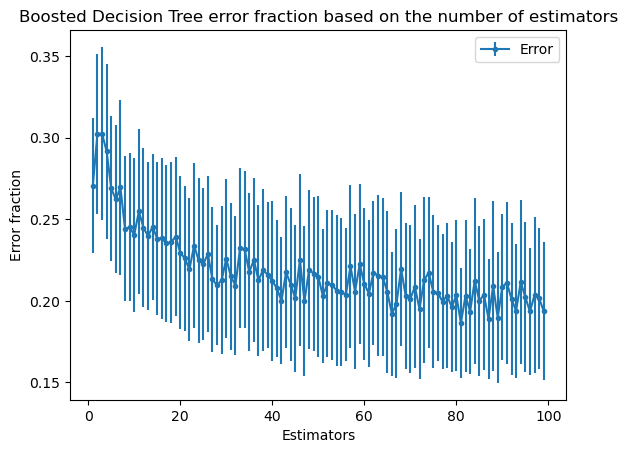

In [ ]:
x = ESTIMATOR_NUM
y, e = calculatePlotValues(estimator_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Estimators")
plt.title(f"""Boosted Decision Tree error fraction based on the number of estimators""")
plt.legend()

In [ ]:
ITER_NUM = 40
DEPTH_NUM = range(1, 20)

# Save the errors after checking each of them through cross validation
depth_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in DEPTH_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, depth=n))/100.0 )
    depth_errors.append(iteration_error)

Accuracy: 74.68%
Accuracy: 60.94%
Accuracy: 75.39%
Accuracy: 51.07%
Accuracy: 70.96%
Accuracy: 47.93%
Accuracy: 61.23%
Accuracy: 61.66%
Accuracy: 54.79%
Accuracy: 73.25%
Accuracy: 68.96%
Accuracy: 63.95%
Accuracy: 59.37%
Accuracy: 73.10%
Accuracy: 66.67%
Accuracy: 73.10%
Accuracy: 55.79%
Accuracy: 56.94%
Accuracy: 48.21%
Accuracy: 75.25%
Accuracy: 63.81%
Accuracy: 66.38%
Accuracy: 63.23%
Accuracy: 64.09%
Accuracy: 65.95%
Accuracy: 70.82%
Accuracy: 67.38%
Accuracy: 62.09%
Accuracy: 43.35%
Accuracy: 71.39%
Accuracy: 66.95%
Accuracy: 67.24%
Accuracy: 73.68%
Accuracy: 63.95%
Accuracy: 74.39%
Accuracy: 48.64%
Accuracy: 52.07%
Accuracy: 74.11%
Accuracy: 61.09%
Accuracy: 77.83%
Accuracy: 79.11%
Accuracy: 76.11%
Accuracy: 79.11%
Accuracy: 64.23%
Accuracy: 63.66%
Accuracy: 68.81%
Accuracy: 80.11%
Accuracy: 76.11%
Accuracy: 63.81%
Accuracy: 81.55%
Accuracy: 74.68%
Accuracy: 73.39%
Accuracy: 55.79%
Accuracy: 75.82%
Accuracy: 70.96%
Accuracy: 74.11%
Accuracy: 75.54%
Accuracy: 57.08%
Accuracy: 68.9

19
19


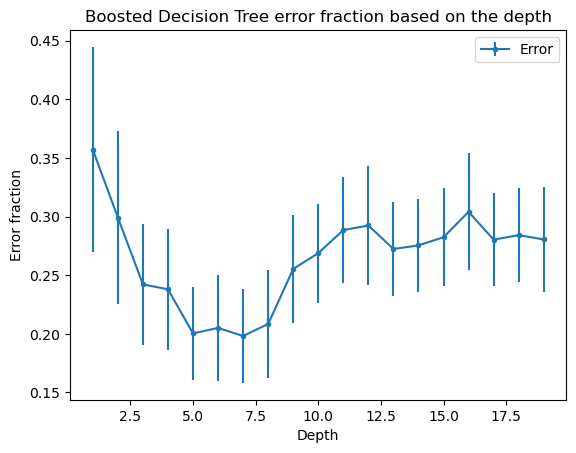

In [ ]:
x = DEPTH_NUM
y, e = calculatePlotValues(depth_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Depth")
plt.title(f"""Boosted Decision Tree error fraction based on the depth""")
plt.legend()

In [ ]:
ITER_NUM = 80
COMP_NUM = range(1, 14)

# Save the errors after checking each of them through cross validation
comp_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in COMP_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, components=n, estimators=80, depth=5))/100.0 )
    comp_errors.append(iteration_error)

13
13


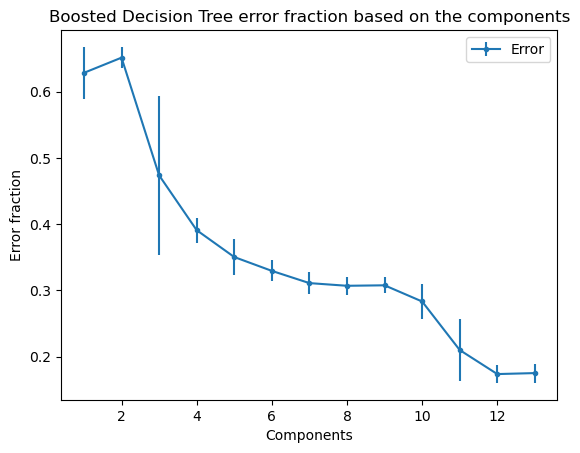

In [ ]:
x = COMP_NUM
y, e = calculatePlotValues(comp_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Components")
plt.title(f"""Boosted Decision Tree error fraction based on the components""")
plt.legend()